In [1]:
import os
import boto3
from boto3.dynamodb.conditions import Key, Attr

from IPython.display import Image

s3 = boto3.client('s3')
dynamodb = boto3.resource('dynamodb')

myBucket = 'antoine-working-bucket'
myTable = 'antoine-working-table'
myPartitionKey = 'cameraId'
mySortKey = 'scrapeTime'

table = dynamodb.Table(myTable)

response = table.scan(
    FilterExpression=Attr(mySortKey).begins_with('2')
)
items = response['Items']

for i in range(len(items)):
    print(items[i])

{u'scrapeTime': u'2016-08-10T13:13:37.232Z', u'weather': u'Cloudy', u'site': u'Rostherne No 2', u'cameraId': u'TL-405401', u'temperature': u'16\xb0C'}
{u'scrapeTime': u'2016-08-10T13:13:37.232Z', u'weather': u'Cloudy', u'site': u'Epping', u'cameraId': u'TL-406192', u'temperature': u'15\xb0C'}
{u'scrapeTime': u'2016-08-10T13:13:37.232Z', u'weather': u'Cloudy', u'site': u'Tatton Park', u'cameraId': u'TL-405316', u'temperature': u'15\xb0C'}
{u'scrapeTime': u'2016-08-10T13:13:37.232Z', u'weather': u'Cloudy', u'site': u'Stansted Mountfitchet', u'cameraId': u'TL-406205', u'temperature': u'15\xb0C'}
{u'scrapeTime': u'2016-08-10T13:13:37.232Z', u'weather': u'Cloudy', u'site': u'Epping', u'cameraId': u'TL-406135', u'temperature': u'15\xb0C'}
{u'scrapeTime': u'2016-08-10T13:13:37.232Z', u'weather': u'Cloudy', u'site': u'Arley Hall', u'cameraId': u'TL-405348', u'temperature': u'15\xb0C'}
{u'scrapeTime': u'2016-08-10T13:13:37.232Z', u'weather': u'Cloudy', u'site': u'Knutsford', u'cameraId': u'TL-4

In [2]:
cameraId = raw_input('cameraId: ')
scrapeTime = raw_input('scrapeTime: ')

aPartitionKey = cameraId
aSortKey = scrapeTime
myKey = str(aPartitionKey) + "_" + str(aSortKey) + '.jpg'

cameraId: TL-405401
scrapeTime: 2016-08-10T13:13:37.232Z


In [3]:
def getImage(awsBucket, awsKey, filePath = "/Users/antoine/" + str(myKey)):
    s3.download_file(Bucket=awsBucket, Key=awsKey, Filename= filePath)
    return Image(filePath)

def getItem(awsTable, partitionKey, sortKey, partitionKeyValue, sortKeyValue):
    response = dynamodb.Table(awsTable).get_item(
        Key={
            str(partitionKey): partitionKeyValue,
            str(sortKey): sortKeyValue
        }
    )
    item = response['Item']
    print(item)

In [4]:
getItem(myTable, myPartitionKey, mySortKey, aPartitionKey, aSortKey)

{u'scrapeTime': u'2016-08-10T13:13:37.232Z', u'weather': u'Cloudy', u'site': u'Rostherne No 2', u'cameraId': u'TL-405401', u'temperature': u'16\xb0C'}


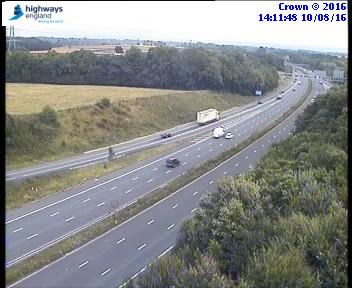

In [5]:
getImage(myBucket, myKey, filePath="/Users/antoine/" + str(myKey))